# Método de la secante

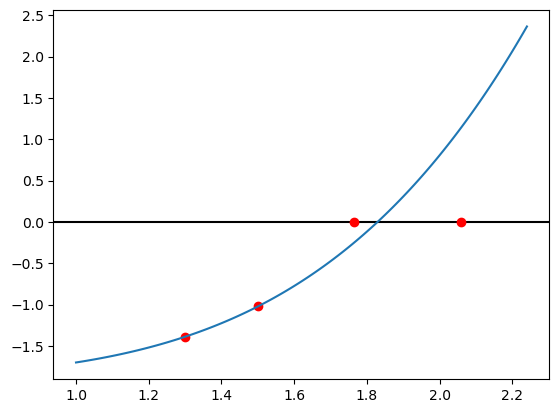

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
    # np.exp(x) + np.power(2,-x) + 2*np.cos(x)-6 

t = np.arange(1,2.25,0.01)
plt.axhline(y=0,color = "black")
x0 = 1.3
x1 = 1.5
x2 = x1 - f(x1)*(x1 - x0)/(f(x1)-f(x0))
x3 = x2 - f(x2)*(x2 - x1)/(f(x2)-f(x1))


plt.plot(x0,f(x0),"or",x1,f(x1),"or",x2,0,"or",x3,0,"or")
plt.plot(t,f(t))
plt.show()

De forma frecuente, calcular la derivada de una  función es una tarea complicada y en tras ocasiones imposible, dado que de forma explícita no se cuanta con la información necesaria.

Por otro lado, a pesar de que el método de Newton-Rapson converge rápidamente a una una raíz, también sabemos  que tiene sus desventajas, las cuales incluyen no convergencia si la aproximación inicial es cercana a un punto de inflexión 

Una alternativa que evita el uso de la derivada y hace las eficiente al método de bisección es el método de la secante que describe enseguida.

Considere una función continua $f(x)$ definida en un intervalo cerrado $[a,b]$ y defina $x_0 =a$ y $x_1 = b$ como los puntos iniciales de la sucesión. 

1. Si $f$ tiene un cambio de signo en $x_0$ y $x_1$, entonces calcular la recta secante que una a $(x_0,f(x_0))$ y a $(x_1,f(x_1))$

2. Calcular $x_2$ la intersección de la recta secante con el eje $x$. Si $x_2$ es la raíz o es suficientemente cercana a la raíz, detener el proceso.

3. En caso contrario, hacer $x_0 =x_0 $ y $x_2 =x_1 $y repetir el procedimiento usando estos nuevos valores.
4.

In [3]:
def metsecante(f,x0,x1,TOL,N0):
    contador = 2
    while contador <N0:
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1)-f(x0))
        if np.abs(x2-x1) >TOL:
            print('%04d' % contador,"\t",f'{x2:.16f}',"\t",f'{f(x2):.16f}',"\t",f'{np.abs(x2-x1):.16f}')
            x0 = x1
            x1 = x2
            contador+=1
        else:
            break
    return x2

print(metsecante(f,1.3,1.5,1e-16,1000))

0002 	 2.0587187315737272 	 1.1383690747047250 	 0.5587187315737272
0003 	 1.7644863280397132 	 -0.2520584565336534 	 0.2942324035340140
0004 	 1.8178251492517161 	 -0.0469497100046183 	 0.0533388212120030
0005 	 1.8300344881037638 	 0.0026710665249912 	 0.0122093388520477
0006 	 1.8293772642838078 	 -0.0000259937322591 	 0.0006572238199560
0007 	 1.8293835984767366 	 -0.0000000141793457 	 0.0000063341929288
0008 	 1.8293836019338674 	 0.0000000000000764 	 0.0000000034571308
0009 	 1.8293836019338487 	 0.0000000000000000 	 0.0000000000000187
1.8293836019338487


In [4]:
import scipy.optimize as optimize

print(optimize.newton(func = f, x0 = 1.3, x1 = 1.5, maxiter = 1000,tol = 1e-16,full_output = True))

(1.8293836019338487,       converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 1.8293836019338487)


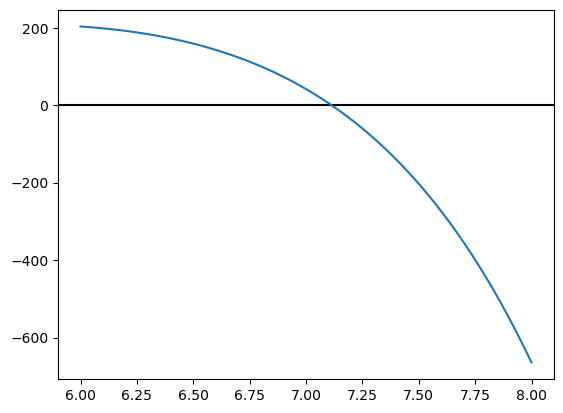

In [9]:
f1 = lambda x: x**3 - np.sinh(x) + 4*x**2 + 6*x + 9

t1 = np.arange(6,8,0.001)
plt.axhline(y=0, color="black")
plt.plot(t1,f1(t1))

In [13]:
metsecante(f1,8,7,1e-16,100)

0002 	 7.0589452421322978 	 20.7982510068364519 	 0.0589452421322978
0003 	 7.1176438876968007 	 -1.8347151376718216 	 0.0586986455645029
0004 	 7.1128855501068262 	 0.0710112205436388 	 0.0047583375899745
0005 	 7.1130628553944222 	 0.0002291194520012 	 0.0001773052875960
0006 	 7.1130634293261039 	 -0.0000000287505202 	 0.0000005739316817
0007 	 7.1130634292540948 	 -0.0000000000001563 	 0.0000000000720091


7.113063429254095